In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('Data Skincare (All).xlsx')
model = RandomForestClassifier(n_jobs=-1, oob_score=True)
# evaluate a given model using cross-validation
def accuracy_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def f1_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def roc_auc_model(model, X, y):
  # define the evaluation procedure
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
  return scores

In [3]:
# get the models to evaluate
models = model

# evaluate the models and store results
results, names = list(), list()

X = df.copy()
X.drop(['Skincare'],axis=1,inplace=True)

y = df['Skincare'].copy()

# evaluate the model
acc_scores = accuracy_model(model, X, y)
f1_scores = f1_model(model, X, y)
roc_scores = roc_auc_model(model, X, y)

# summarize the performance along the way
print('Accuracy %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
print('F1 %.3f (%.3f)' % (mean(f1_scores), std(f1_scores)))
print('ROC AUC %.3f (%.3f)' % (mean(roc_scores), std(roc_scores)))

model.fit(X, y)

# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

print('\nBase Model Full Train Accuracy Score = ', model.score(X,y))

Accuracy 0.645 (0.049)
F1 0.762 (0.036)
ROC AUC 0.633 (0.065)

Base Model Full Train Accuracy Score =  0.9344262295081968


c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
print(acc_scores)

[0.55813953 0.65116279 0.58823529 0.70588235 0.68235294 0.60465116
 0.65116279 0.68235294 0.64705882 0.70588235 0.70930233 0.61627907
 0.56470588 0.62352941 0.68235294]


In [5]:
print(f1_scores)

[0.69642857 0.78195489 0.736      0.81751825 0.8        0.72268908
 0.78518519 0.76422764 0.77941176 0.79674797 0.78740157 0.72580645
 0.72440945 0.72413793 0.78787879]


In [6]:
print(roc_scores)

[0.63927192 0.61048336 0.5730303  0.66810967 0.72033333 0.69527778
 0.66977226 0.60756193 0.54530639 0.69424242 0.67103495 0.56666667
 0.48275862 0.64426523 0.70250896]


In [7]:
cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')

array([0.60465116, 0.69767442, 0.64705882, 0.69411765, 0.68235294])

In [8]:
cross_val_score(model, X, y, scoring='f1', n_jobs=-1, error_score='raise')

array([0.74603175, 0.76923077, 0.8030303 , 0.78688525, 0.78461538])

In [9]:
cross_val_score(model, X, y, scoring='roc_auc', n_jobs=-1, error_score='raise')

array([0.60163339, 0.69181034, 0.66196742, 0.61403509, 0.6679198 ])

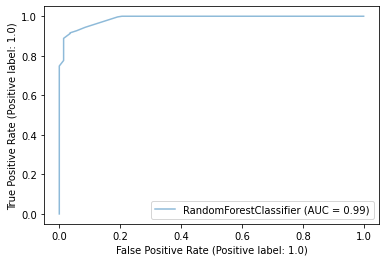

In [10]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model, X, y, ax=ax, alpha=0.5)
plt.show()

In [11]:
def feat_importance(m, df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance, index=df_train.columns, columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

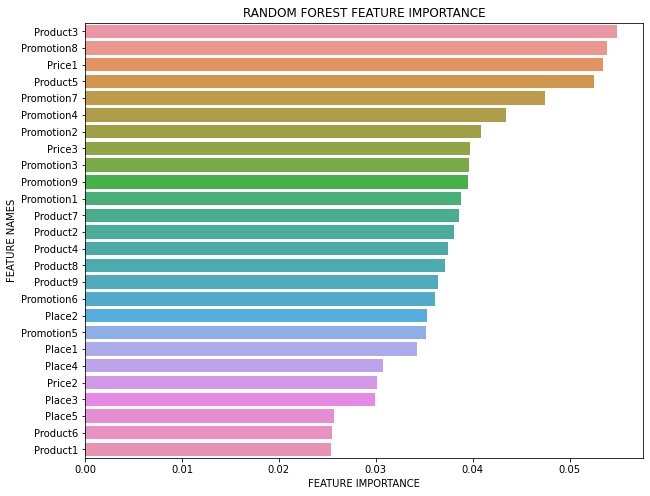

In [12]:
importance = feat_importance(model, X)
plot_feature_importance(importance['Importance'],importance.index,'RANDOM FOREST ')

In [13]:
importance

,Importance
Product3,0.054845
Promotion8,0.053843
Price1,0.053447
Product5,0.052512
Promotion7,0.047417
Promotion4,0.043456
Promotion2,0.040811
Price3,0.039765
Promotion3,0.039585
Promotion9,0.039504
